In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hongweicao/catanddogsmall")

print("Path to dataset files:", path)

C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1


In [3]:
import os

os.listdir(r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small') # lists folders in location

['test', 'train', 'validation']

In [4]:
train = r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\train'
test = r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\test'
validation = r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\validation'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

trainGenerator = ImageDataGenerator(rescale=1/255, rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.2, horizontal_flip=True)
# rescale is normalising, rest are to randomly differentiate images in training
validGenerator = ImageDataGenerator(rescale=1/255)
testGenerator = ImageDataGenerator(rescale=1/255)

train = trainGenerator.flow_from_directory(train, target_size=(200, 200), batch_size=32, class_mode='binary')
validation = validGenerator.flow_from_directory(validation, target_size=(200, 200), batch_size=32, class_mode='binary')
testData = validGenerator.flow_from_directory(test, target_size=(200, 200), batch_size=32, class_mode='binary')

# preprocessing ^

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


(375, 500, 3)

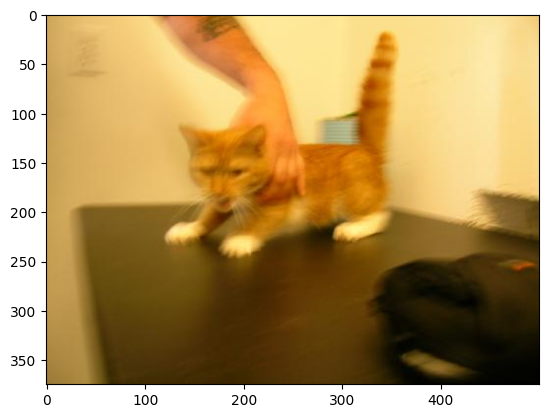

In [6]:
import matplotlib.pyplot as plt

img = load_img(r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\train\cats\0.jpg')

plt.imshow(img)
img_to_array(img).shape

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), # image shape then rgb
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # probability classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train, epochs=10, validation_data=validation)

C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 732ms/step - accuracy: 0.4995 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 753ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 817ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 745ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 51s 812ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 48s 768ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 745ms/step - accuracy: 0.5000 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 49s 769ms/step

In [8]:
from tensorflow.keras.applications import VGG16 # importing VGG16 pre-trained model

preModel = VGG16(weights='imagenet', input_shape=(200, 200, 3), include_top=False) # weights -> https://www.image-net.org/, the dataset VGG16 is trained off of
preModel.layers

[<InputLayer name=input_layer_1, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [9]:
for layer in preModel.layers:
    layer.trainable = False # freezing the layer

In [10]:
preModelLayers = preModel.output
preModelLayers = Flatten()(preModelLayers)
preModelLayers = Dense(64, activation='relu')(preModelLayers)
prediction = Dense(1, activation='sigmoid')(preModelLayers)

In [11]:
from tensorflow.keras.models import Model

preModel = Model(inputs=preModel.input, outputs=prediction)

preModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
preModel.fit(train, epochs=10, validation_data=validation)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.7785 - loss: 0.4661 - val_accuracy: 0.9050 - val_loss: 0.2483
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.8905 - loss: 0.2700 - val_accuracy: 0.9110 - val_loss: 0.2086
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.9035 - loss: 0.2323 - val_accuracy: 0.9150 - val_loss: 0.2126
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.9135 - loss: 0.2152 - val_accuracy: 0.9140 - val_loss: 0.2195
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.8900 - loss: 0.2740 - val_accuracy: 0.9110 - val_loss: 0.2272
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.9245 - loss: 0.1940 - val_accuracy: 0.8970 - val_loss: 0.2683
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.9305 - loss: 0.1793 - val_accuracy: 0.8880 - val_loss: 0.2915
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 179s 3s/step - accuracy: 0.9250 - loss: 0.1786 - val_accuracy: 0.9180 - v

In [23]:
model.save('basicModel.h5')
preModel.save('pretrainedModel.h5')

In [15]:
basicPrediction = model.predict(testData)
prePrediction = preModel.predict(testData)

C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 335ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[[0.]]


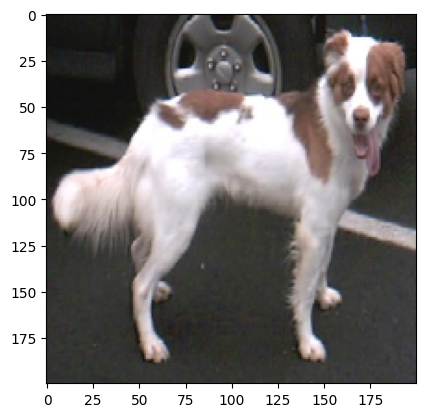

In [16]:
import numpy as np

img = load_img(r'C:\Users\eyomi\.cache\kagglehub\datasets\hongweicao\catanddogsmall\versions\1\dogvscat_small\test\dogs\1500.jpg', target_size=(200, 200))
plt.imshow(img)
img = img_to_array(img)
img /= 255
img = np.expand_dims(img, axis=0) # expand dimensions
prediction = model.predict(img)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


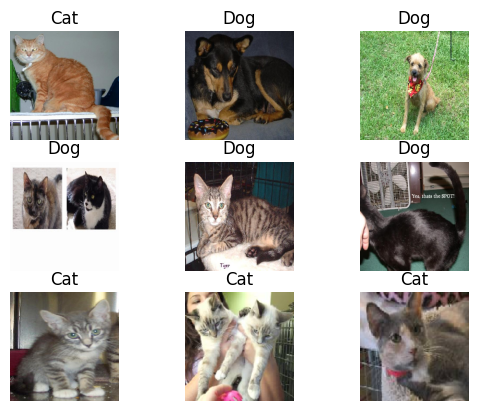

In [22]:
valueArray, labelArray = next(validation)
prediction = model.predict(valueArray)

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(valueArray[i])
    plt.axis('off')
    if prePrediction[i] < 0.5:
        plt.title('Cat')
    else:
        plt.title('Dog')
    
plt.show()

In [19]:
print(prePrediction)

[[2.74485035e-04]
 [9.99999940e-01]
 [9.99983311e-01]
 [9.99994338e-01]
 [9.36614871e-01]
 [9.99993324e-01]
 [7.83798471e-03]
 [3.59554738e-01]
 [4.91993129e-01]
 [1.27055170e-02]
 [6.75016463e-01]
 [9.98179555e-01]
 [3.43270339e-02]
 [9.99283612e-01]
 [1.88570563e-02]
 [7.40678757e-02]
 [3.27125341e-01]
 [2.81562954e-01]
 [2.31575876e-01]
 [9.53865767e-01]
 [9.51933861e-01]
 [1.29517481e-01]
 [1.21862940e-01]
 [9.96080458e-01]
 [4.71989401e-02]
 [9.99894738e-01]
 [9.21265483e-01]
 [9.89141524e-01]
 [5.21489361e-04]
 [9.99967217e-01]
 [9.99931216e-01]
 [8.64622176e-01]
 [6.34564236e-02]
 [9.99994636e-01]
 [3.58671503e-04]
 [9.99830961e-01]
 [1.10497111e-02]
 [9.99475777e-01]
 [9.44977939e-01]
 [7.49098957e-01]
 [1.75253358e-02]
 [2.23183200e-01]
 [4.14972119e-02]
 [5.77610493e-01]
 [7.77151942e-01]
 [9.99836445e-01]
 [1.08966297e-02]
 [6.81310713e-01]
 [9.99930143e-01]
 [1.54592663e-01]
 [1.00000000e+00]
 [9.99997675e-01]
 [9.92744207e-01]
 [9.66261327e-01]
 [3.61167081e-03]
 [9.999700